# Import Data

In [1]:
# clear memory
import gc
gc.collect()
%reset -f

In [2]:
# helper.py
from helper import *

# score function
from metric import score

In [3]:
# load data
data = pl.read_parquet(root + 'train_series_clean.parquet')
events = pl.read_csv(root + 'train_events.csv')
test = pl.read_parquet(root + 'test_series_clean.parquet')

# show number of unique series
print('Number of unique series:', data['series_id'].n_unique())

Number of unique series: 277


# Split Data

In [4]:
# get train and val subsets (28 users = 10% subset of 277 users)
data_train, data_val, events_train, events_val = train_val_split(series=data, events=events, n=28)

# check number of users in each subset
print(f'Train data series_ids: {data_train["series_id"].n_unique()}')
print(f'Val data series_ids: {data_val["series_id"].n_unique()}')

Train data series_ids: 22
Val data series_ids: 6


# Feature Engineering

In [5]:
# create features
features_train = create_features(data_train)
features_val = create_features(data_val)

# check
features_train.sample()

series_id,step,anglez,enmo,date,hour,anglez_diff,enmo_diff,day,asleep,anglez_1m_min,anglez_1m_max,anglez_1m_mean,anglez_1m_std,anglez_diff_1m_min,anglez_diff_1m_max,anglez_diff_1m_mean,anglez_diff_1m_std,enmo_1m_min,enmo_1m_max,enmo_1m_mean,enmo_1m_std,enmo_diff_1m_min,enmo_diff_1m_max,enmo_diff_1m_mean,enmo_diff_1m_std,anglez_3m_min,anglez_3m_max,anglez_3m_mean,anglez_3m_std,anglez_diff_3m_min,anglez_diff_3m_max,anglez_diff_3m_mean,anglez_diff_3m_std,enmo_3m_min,enmo_3m_max,enmo_3m_mean,enmo_3m_std,enmo_diff_3m_min,enmo_diff_3m_max,enmo_diff_3m_mean,enmo_diff_3m_std,anglez_5m_min,anglez_5m_max,anglez_5m_mean,anglez_5m_std,anglez_diff_5m_min,anglez_diff_5m_max,anglez_diff_5m_mean,anglez_diff_5m_std,enmo_5m_min,enmo_5m_max,enmo_5m_mean,enmo_5m_std,enmo_diff_5m_min,enmo_diff_5m_max,enmo_diff_5m_mean,enmo_diff_5m_std,anglez_7.5m_min,anglez_7.5m_max,anglez_7.5m_mean,anglez_7.5m_std,anglez_diff_7.5m_min,anglez_diff_7.5m_max,anglez_diff_7.5m_mean,anglez_diff_7.5m_std,enmo_7.5m_min,enmo_7.5m_max,enmo_7.5m_mean,enmo_7.5m_std,enmo_diff_7.5m_min,enmo_diff_7.5m_max,enmo_diff_7.5m_mean,enmo_diff_7.5m_std,anglez_10m_min,anglez_10m_max,anglez_10m_mean,anglez_10m_std,anglez_diff_10m_min,anglez_diff_10m_max,anglez_diff_10m_mean,anglez_diff_10m_std,enmo_10m_min,enmo_10m_max,enmo_10m_mean,enmo_10m_std,enmo_diff_10m_min,enmo_diff_10m_max,enmo_diff_10m_mean,enmo_diff_10m_std,anglez_12.5m_min,anglez_12.5m_max,anglez_12.5m_mean,anglez_12.5m_std,anglez_diff_12.5m_min,anglez_diff_12.5m_max,anglez_diff_12.5m_mean,anglez_diff_12.5m_std,enmo_12.5m_min,enmo_12.5m_max,enmo_12.5m_mean,enmo_12.5m_std,enmo_diff_12.5m_min,enmo_diff_12.5m_max,enmo_diff_12.5m_mean,enmo_diff_12.5m_std,anglez_15m_min,anglez_15m_max,anglez_15m_mean,anglez_15m_std,anglez_diff_15m_min,anglez_diff_15m_max,anglez_diff_15m_mean,anglez_diff_15m_std,enmo_15m_min,enmo_15m_max,enmo_15m_mean,enmo_15m_std,enmo_diff_15m_min,enmo_diff_15m_max,enmo_diff_15m_mean,enmo_diff_15m_std,anglez_20m_min,anglez_20m_max,anglez_20m_mean,anglez_20m_std,anglez_diff_20m_min,anglez_diff_20m_max,anglez_diff_20m_mean,anglez_diff_20m_std,enmo_20m_min,enmo_20m_max,enmo_20m_mean,enmo_20m_std,enmo_diff_20m_min,enmo_diff_20m_max,enmo_diff_20m_mean,enmo_diff_20m_std,anglez_25m_min,anglez_25m_max,anglez_25m_mean,anglez_25m_std,anglez_diff_25m_min,anglez_diff_25m_max,anglez_diff_25m_mean,anglez_diff_25m_std,enmo_25m_min,enmo_25m_max,enmo_25m_mean,enmo_25m_std,enmo_diff_25m_min,enmo_diff_25m_max,enmo_diff_25m_mean,enmo_diff_25m_std,anglez_30m_min,anglez_30m_max,anglez_30m_mean,anglez_30m_std,anglez_diff_30m_min,anglez_diff_30m_max,anglez_diff_30m_mean,anglez_diff_30m_std,enmo_30m_min,enmo_30m_max,enmo_30m_mean,enmo_30m_std,enmo_diff_30m_min,enmo_diff_30m_max,enmo_diff_30m_mean,enmo_diff_30m_std,anglez_60m_min,anglez_60m_max,anglez_60m_mean,anglez_60m_std,anglez_diff_60m_min,anglez_diff_60m_max,anglez_diff_60m_mean,anglez_diff_60m_std,enmo_60m_min,enmo_60m_max,enmo_60m_mean,enmo_60m_std,enmo_diff_60m_min,enmo_diff_60m_max,enmo_diff_60m_mean,enmo_diff_60m_std,anglez_120m_min,anglez_120m_max,anglez_120m_mean,anglez_120m_std,anglez_diff_120m_min,anglez_diff_120m_max,anglez_diff_120m_mean,anglez_diff_120m_std,enmo_120m_min,enmo_120m_max,enmo_120m_mean,enmo_120m_std,enmo_diff_120m_min,enmo_diff_120m_max,enmo_diff_120m_mean,enmo_diff_120m_std,anglez_180m_min,anglez_180m_max,anglez_180m_mean,anglez_180m_std,anglez_diff_180m_min,anglez_diff_180m_max,anglez_diff_180m_mean,anglez_diff_180m_std,enmo_180m_min,enmo_180m_max,enmo_180m_mean,enmo_180m_std,enmo_diff_180m_min,enmo_diff_180m_max,enmo_diff_180m_mean,enmo_diff_180m_std,anglez_240m_min,anglez_240m_max,anglez_240m_mean,anglez_240m_std,anglez_diff_240m_min,anglez_diff_240m_max,anglez_diff_240m_mean,anglez_diff_240m_std,enmo_240m_min,enmo_240m_max,enmo_240m_mean,enmo_240m_std,enmo_diff_240m_min,enmo_diff_240m_max,enmo_diff_240m_mean,enmo_diff_240m_std,anglez_480m_min,anglez_480m_max,anglez_480m_mean,anglez_480m_std,anglez_diff_480m_min,anglez_diff_480m_max,anglez_diff_480m_mean,a

- 5 non-feature columns ('series_id', 'step', 'date', 'day', 'asleep').
- 244 z-angle/enmo features + hour of day (__245 features total__).

In [6]:
# define non-feature cols
non_feat_cols = ['series_id', 'step', 'date', 'day', 'asleep']

# define x and y
X_train = features_train.drop(non_feat_cols)
y_train = features_train.select("asleep").to_numpy().ravel()
X_val = features_val.drop(non_feat_cols)
y_val = features_val.select("asleep").to_numpy().ravel()

# check shapes
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}')

X_train shape: (10963440, 245)
y_train shape: (10963440,)
X_val shape: (2822760, 245)
y_val shape: (2822760,)


# XGBoost on 10% Subset

              precision    recall  f1-score   support

       False       0.98      0.97      0.97   2062752
        True       0.91      0.95      0.93    760008

    accuracy                           0.96   2822760
   macro avg       0.95      0.96      0.95   2822760
weighted avg       0.96      0.96      0.96   2822760



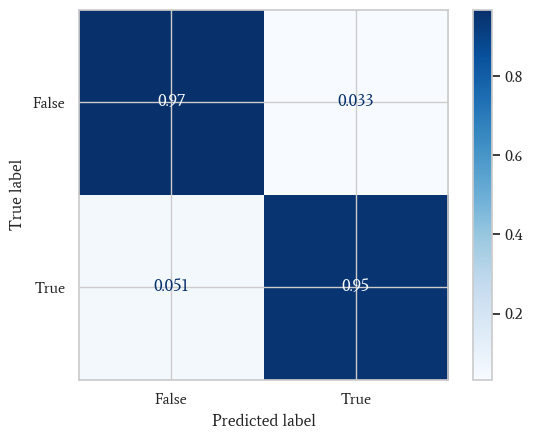

In [ ]:
# create xgb and fit
xgb = XGBClassifier(random_state=SEED, n_jobs=-1, tree_method='hist')
xgb.fit(X_train, y_train)

# get train and val preds
train_preds = xgb.predict(X_train)
val_preds = xgb.predict(X_val)

# validation performance
print(classification_report(y_val, val_preds))
ConfusionMatrixDisplay.from_predictions(y_val, val_preds, normalize='true', cmap='Blues');

- Got about __96% accuracy on the 10% subset__ using a base XGBoost model.

# XGBoost on All Data

In [ ]:
# iterate through batches
for i, features in enumerate(batch_data(data)):
    # define x and y
    X_batch = features.drop(non_feat_cols)
    y_batch = features.select("asleep").to_numpy().ravel()

    if i == 0:
        # for the first batch, train normally
        xgb.fit(X_batch, y_batch)
    else:
        # continue training using the current booster
        xgb.fit(X_batch, y_batch, xgb_model=xgb.get_booster())

# save model weights
xgb.save_model('xgb_model.json')

In [ ]:
# get predictions
preds = predict(data.drop(['day', 'asleep']), xgb)

# get labels for validation set
labels = events.filter(pl.col('series_id').is_in(data.select(pl.col('series_id')).unique())).select(['series_id', 'step', 'event']).to_pandas()

# args for scoring function
tolerance_values = [12, 36, 60, 90, 120, 150, 180, 240, 300, 360]
tolerances = {"onset": tolerance_values, "wakeup": tolerance_values}

# get score
final_score = score(solution=events.select(['series_id', 'step', 'event']).to_pandas(), submission=preds, tolerances=tolerances, 
                    series_id_column_name='series_id', time_column_name='step', event_column_name='event', score_column_name='score')

# check score
final_score

Processing users: 100%|██████████| 277/277 [36:52<00:00,  7.99s/it]


0.058111844625839446

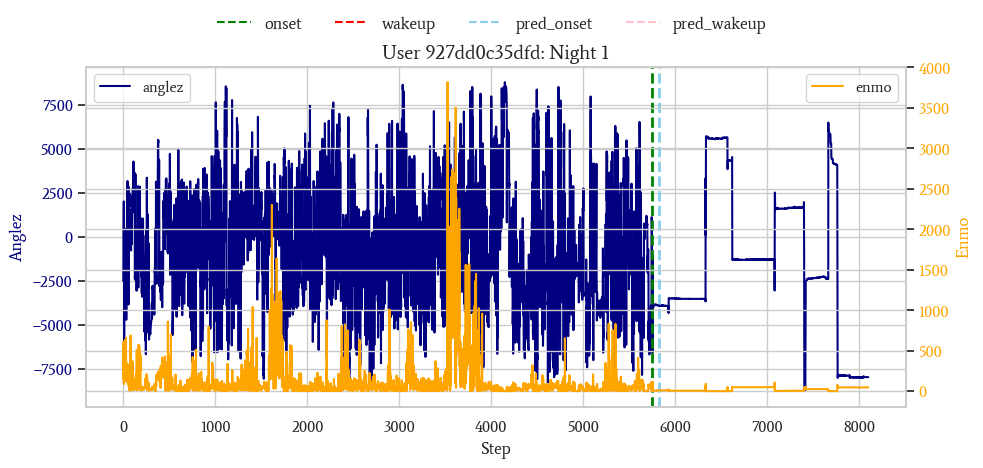

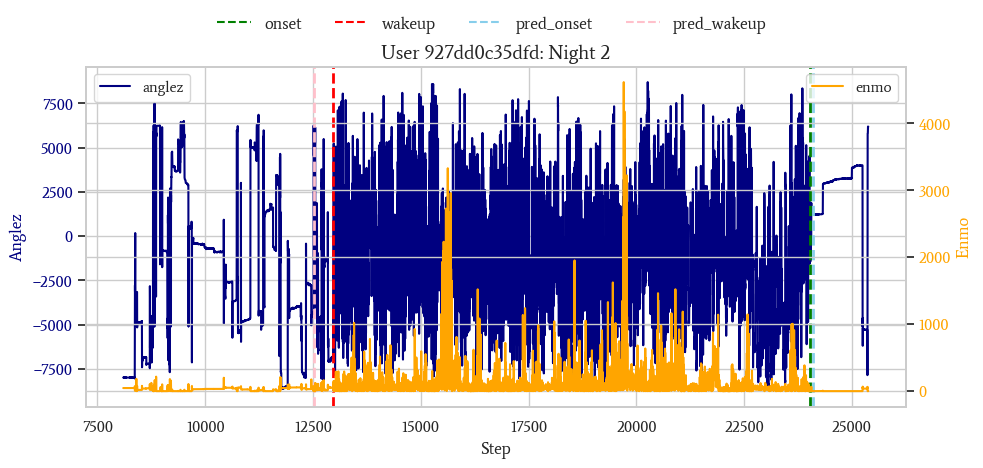

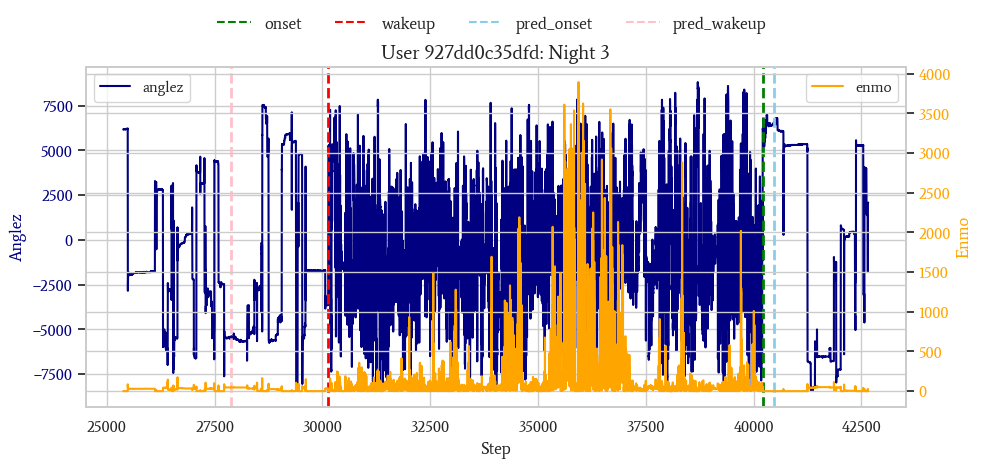

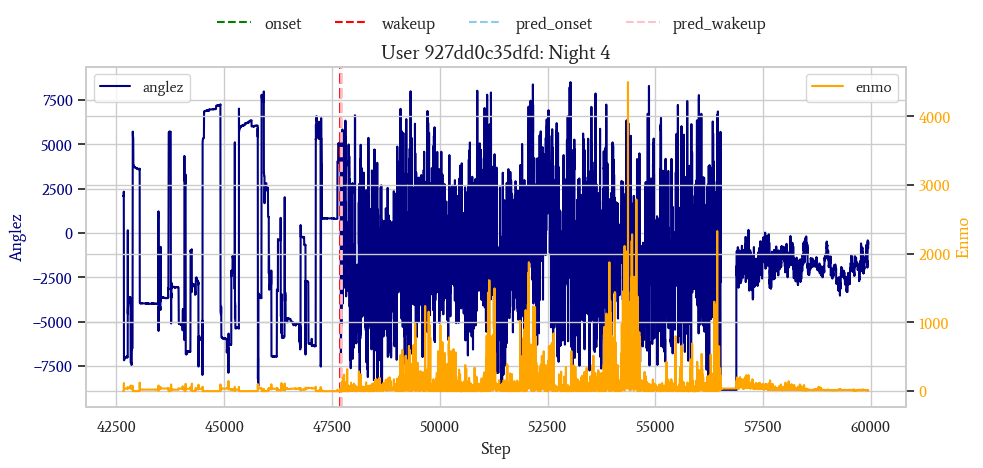

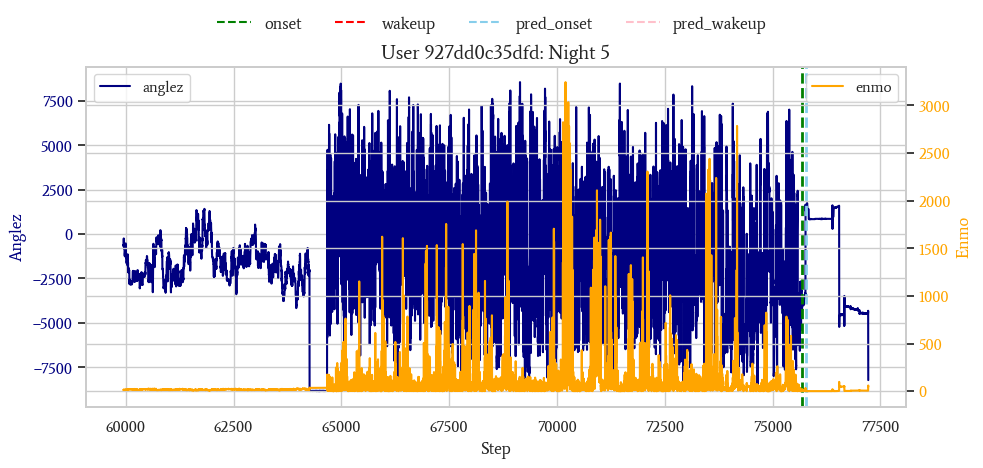

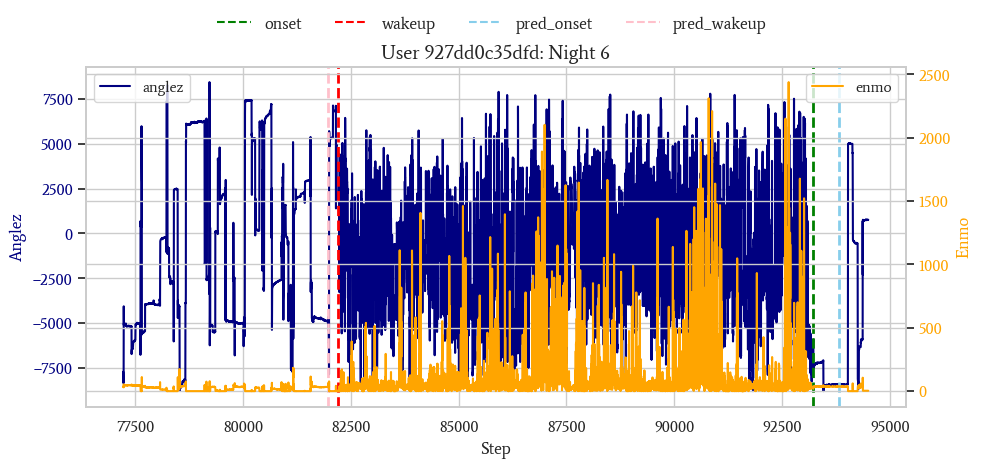

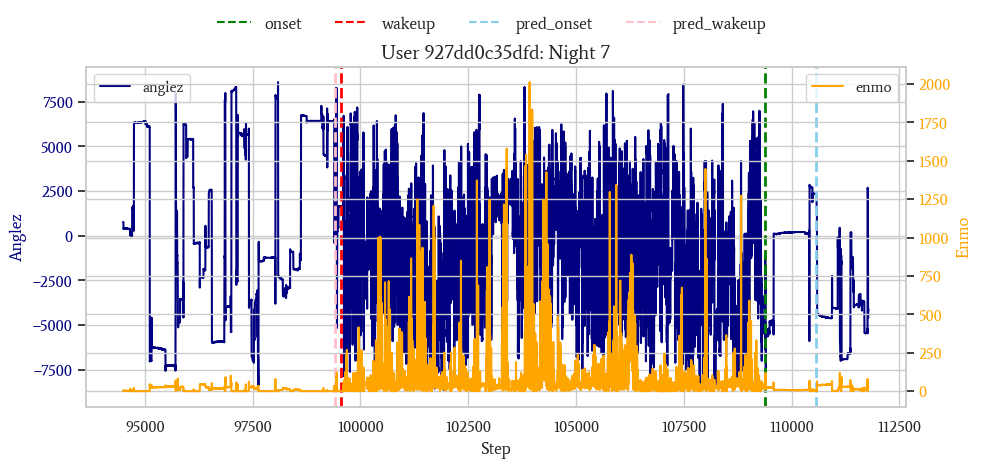

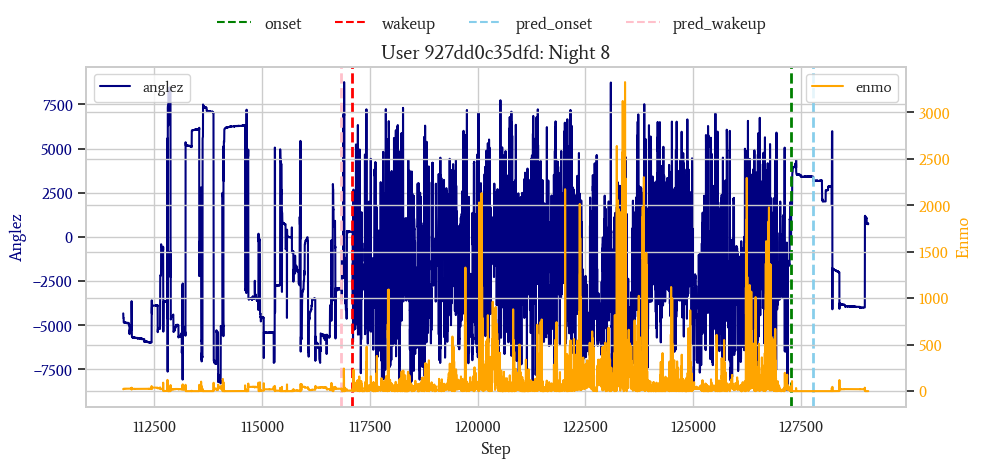

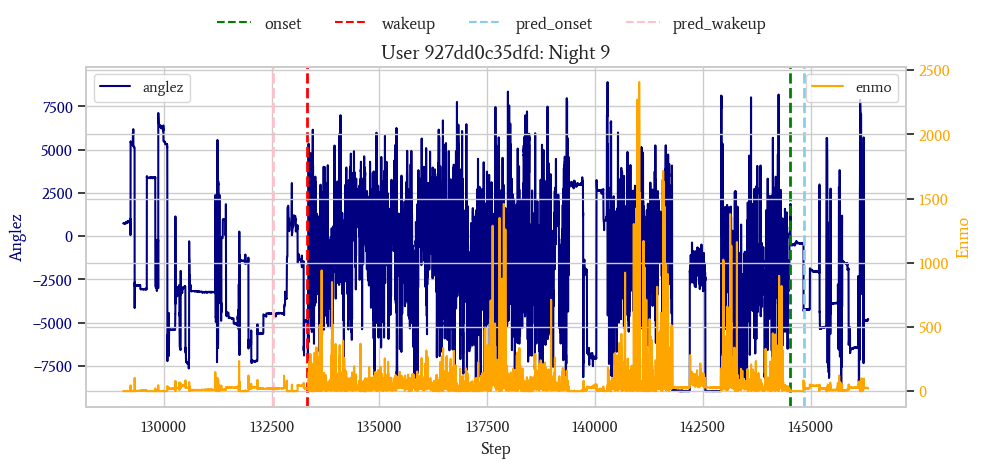

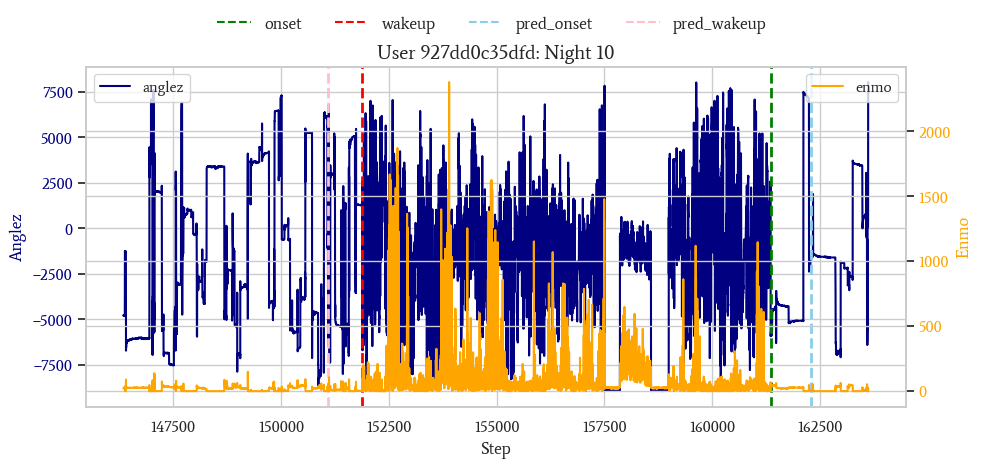

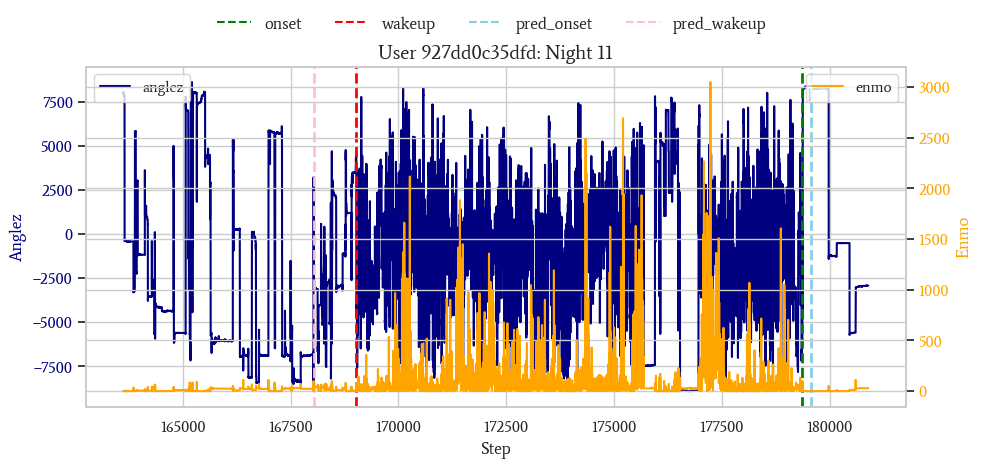

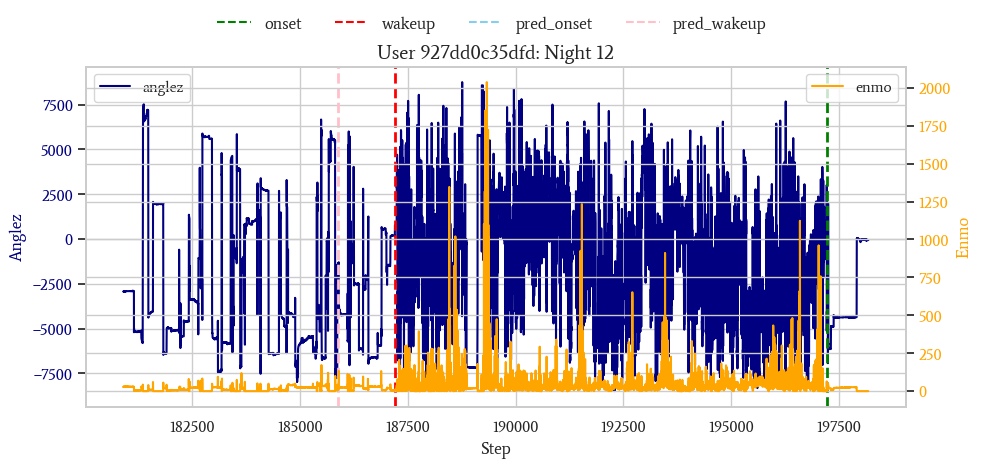

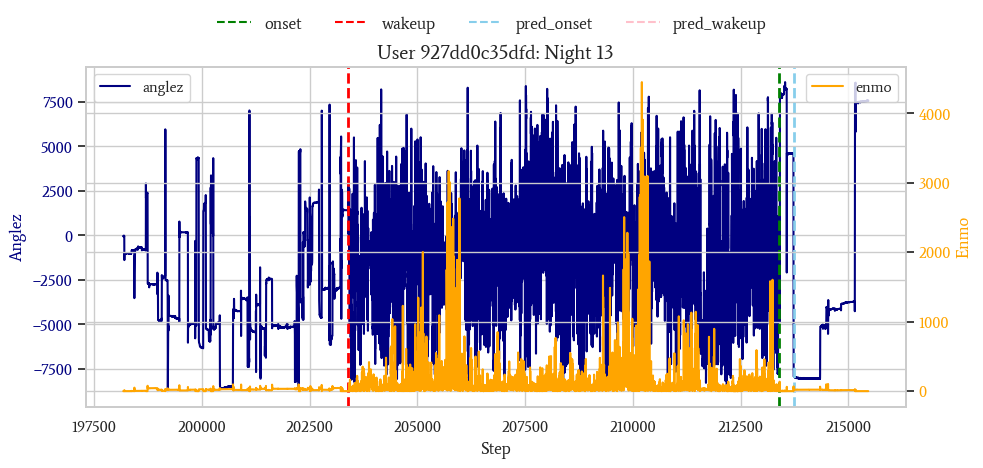

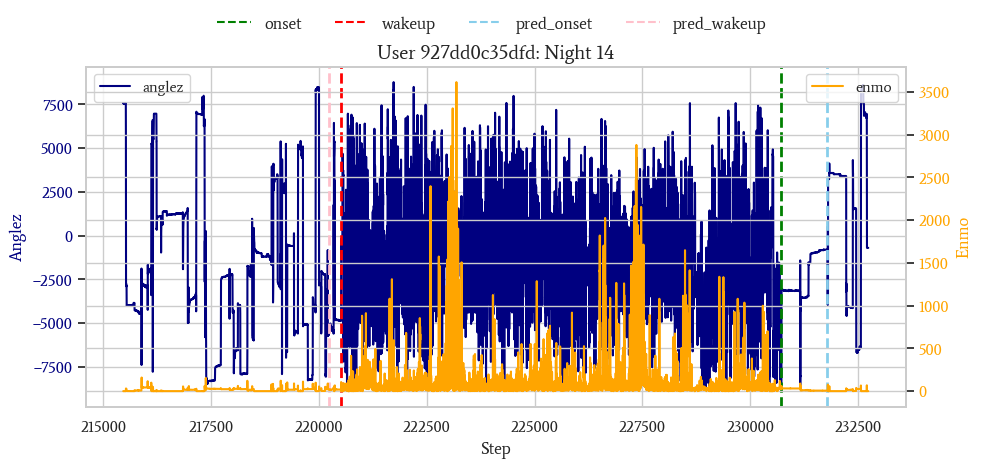

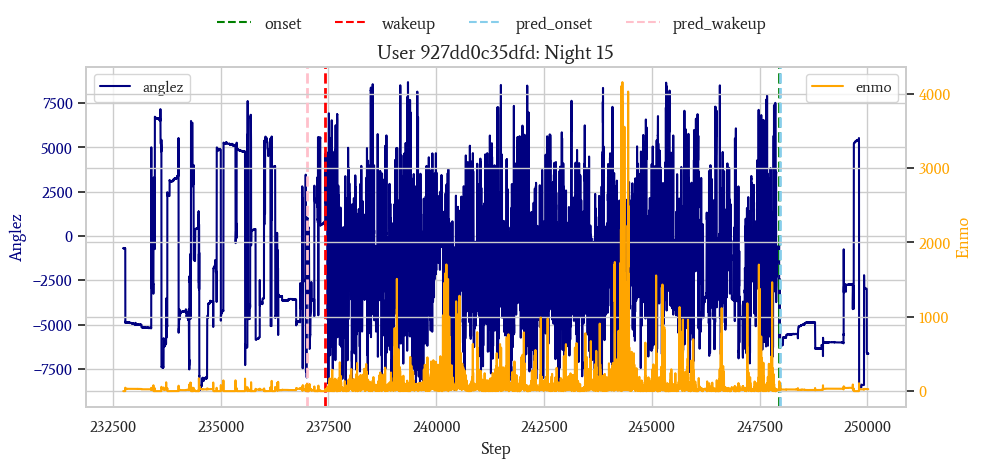

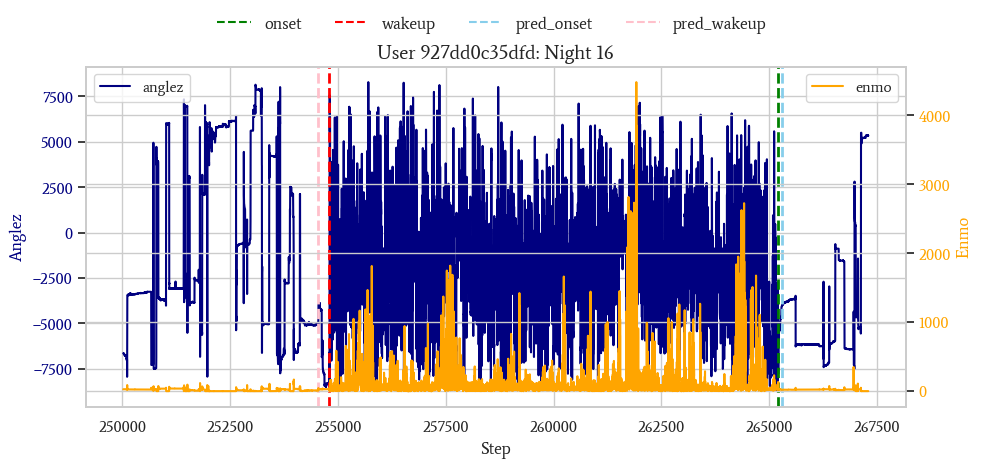

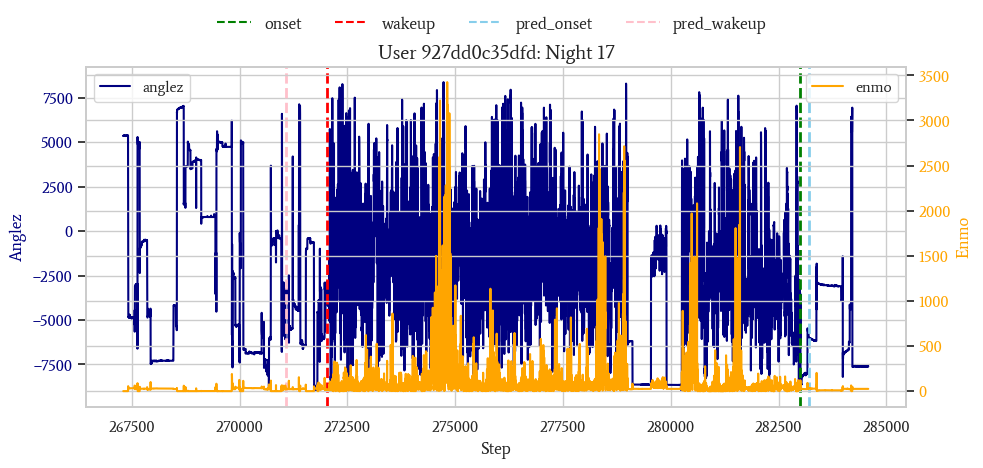

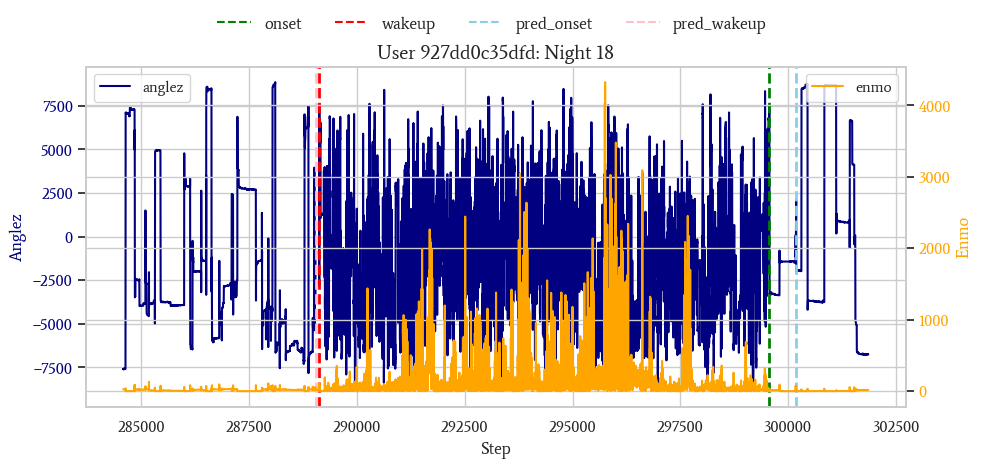

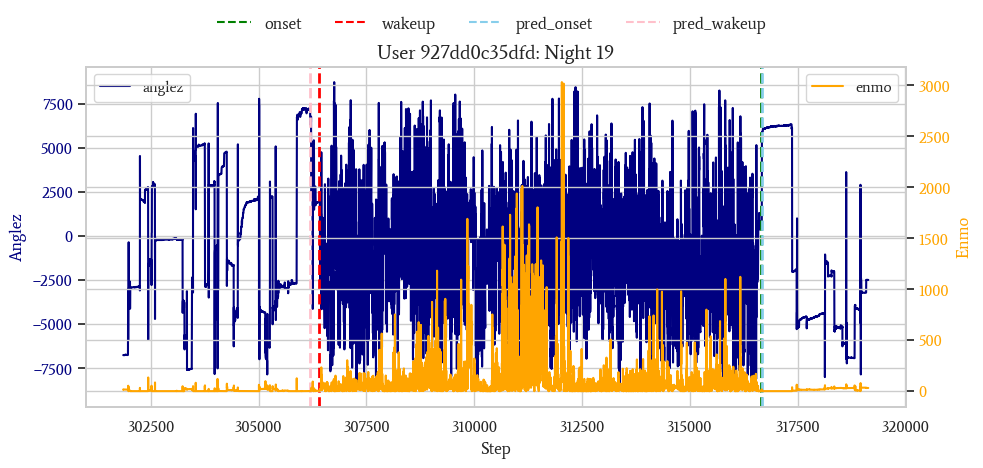

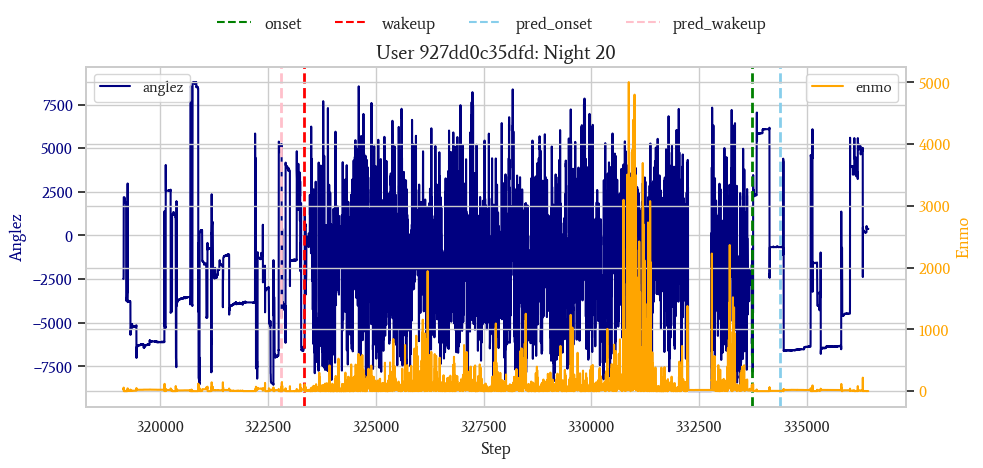

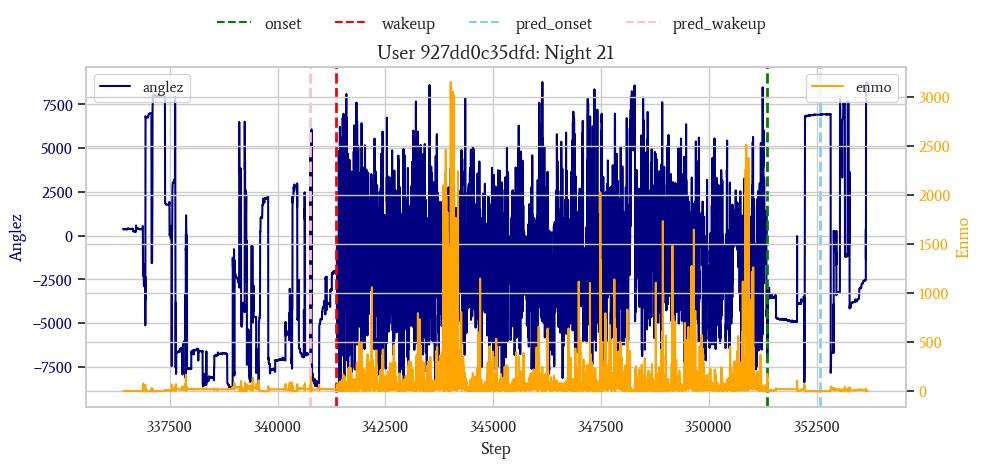

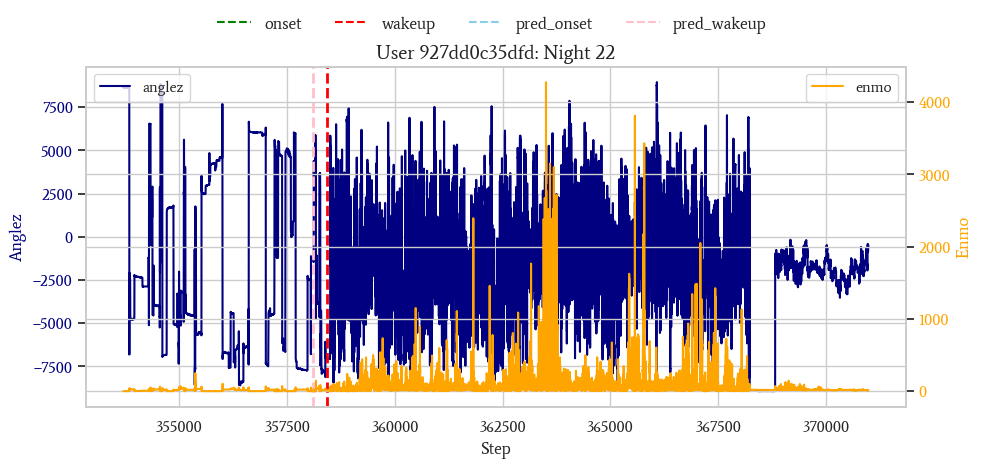

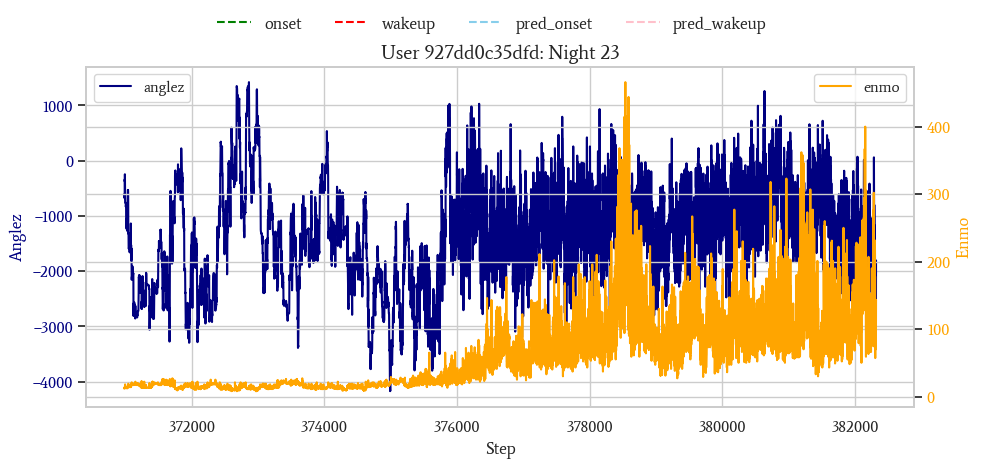

In [22]:
# get a random user
user_id = get_random_id(data)

# get data, preds, and events for the user
user_data = data.filter(pl.col('series_id') == user_id)
user_preds = preds.query('series_id == @user_id')
user_events = events.filter(pl.col('series_id') == user_id)

# plot preds
plot_preds(user_data, user_preds, user_events)

# Submission

In [56]:
# get predictions
preds = predict(test, xgb).drop('date', axis=1)

# check
preds

Processing users: 100%|██████████| 3/3 [00:00<00:00, 24.69it/s]


,row_id,series_id,step,event,score


- The dummy test data doesn't contain enough data for our model to predict events, so it is empty.